# Face recognition using Deep Learning(CNN)

### Reading the Images data

In [1]:
import warnings
warnings.filterwarnings('ignore')

import re   
import matplotlib.pyplot as plt
from skimage.io import imread, imshow
from skimage.transform import resize
import os
import numpy as np
import pandas as pd

In [2]:
# load data
from keras.datasets import mnist
(X_train, Y_train), (X_test, Y_test) = mnist.load_data()

11501568/11490434 [==============================] - 0s 0us/step


In [3]:
# Dimension of data
(X_train.shape, Y_train.shape), (X_test.shape, Y_test.shape)

(((60000, 28, 28), (60000,)), ((10000, 28, 28), (10000,)))

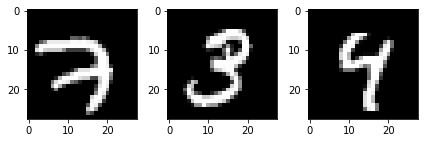

In [4]:
# Diplay 3 data of training data from index no. 5000 to 5002 points
for i in range(3):
  plt.subplot(1,3,i+1)
  imshow(X_train[5000 + i])


In [37]:
# As we seen below all randomly selected data from training set has same dimension, we dont need to resize the images size
for ind in np.random.choice(len(X_train), 10, replace=False):
  print(f'dimension of X_train[{ind}] : {X_train[ind].shape}')

dimension of X_train[1680] : (28, 28, 1)
dimension of X_train[22243] : (28, 28, 1)
dimension of X_train[3305] : (28, 28, 1)
dimension of X_train[38698] : (28, 28, 1)
dimension of X_train[4256] : (28, 28, 1)
dimension of X_train[10585] : (28, 28, 1)
dimension of X_train[10749] : (28, 28, 1)
dimension of X_train[41331] : (28, 28, 1)
dimension of X_train[5426] : (28, 28, 1)
dimension of X_train[2452] : (28, 28, 1)


In [39]:
# image sizes of test dataset
for ind in np.random.choice(len(X_test), 10, replace=False):
  print(f'dimension of X_test[{ind}] : {X_test[ind].shape}')

dimension of X_test[2010] : (28, 28, 1)
dimension of X_test[2947] : (28, 28, 1)
dimension of X_test[9516] : (28, 28, 1)
dimension of X_test[1907] : (28, 28, 1)
dimension of X_test[2190] : (28, 28, 1)
dimension of X_test[9227] : (28, 28, 1)
dimension of X_test[1289] : (28, 28, 1)
dimension of X_test[8359] : (28, 28, 1)
dimension of X_test[4272] : (28, 28, 1)
dimension of X_test[4042] : (28, 28, 1)


In [6]:
Y_train[5000:5003]

array([7, 3, 4], dtype=uint8)

In [7]:
# pixel matrix of a image(X_train[5000])
X_train[5000]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  

Text(0.5, 0, 'classes')

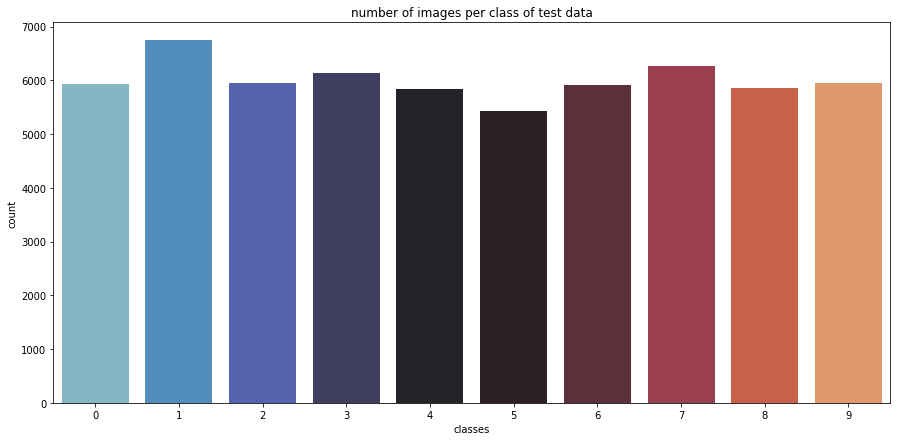

In [8]:
# visualize number of images per class in training dataset
import seaborn as sns

plt.figure(figsize=(15,7))
g = sns.countplot(Y_train, palette="icefire")
plt.title("number of images per class of test data")
plt.xlabel("classes")

In [9]:
X_train = X_train/255.
X_test = X_test/255.
X_train[5000]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

In [10]:
# datatype of training data Predictors
X_train.dtype

dtype('float64')

In [11]:
# change datatype
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train.dtype

dtype('float32')

In [12]:
# Reshape the predictor/input bcz CNN take 3D input, "-1" is for total no. of rows, "28,28" image size, "1" is for no. of channels(image gray or colorful)
X_train = X_train.reshape(-1, 28,28,1)
X_test = X_test.reshape(-1, 28,28,1)
X_train.shape, X_test.shape

((60000, 28, 28, 1), (10000, 28, 28, 1))

In [13]:
# Change the labels from categorical to one-hot encoding
# one-hot-encoding of target column, there are 10 unique classes in target column
# so there could be make 10 columns from 1 target column
from tensorflow.keras.utils import to_categorical

y_train_cat = to_categorical(Y_train)
y_test_cat = to_categorical(Y_test)

# Display the change for category label using one-hot encoding
print('Original label:', Y_train[5000])
print('After conversion to one-hot:', y_train_cat[5000],'\n')
print(f'Y_train_one_hot first 3 rows: \n{y_train_cat[:3]}\n')
print(f'Y_test_one_hot first 3 rows: \n{y_test_cat[:3]}')

Original label: 7
After conversion to one-hot: [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.] 

Y_train_one_hot first 3 rows: 
[[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]]

Y_test_one_hot first 3 rows: 
[[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]]


In [14]:
# shape of newly created target data
y_train_cat.shape, y_test_cat.shape

((60000, 10), (10000, 10))

In [15]:
print("X_train shape",X_train.shape)
print("X_test shape",X_test.shape)
print("y_train shape", Y_train.shape)
print("y_test shape", Y_test.shape)

X_train shape (60000, 28, 28, 1)
X_test shape (10000, 28, 28, 1)
y_train shape (60000,)
y_test shape (10000,)


In [16]:
# network Structure defined
from sklearn.metrics import confusion_matrix
import tensorflow as tf

import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D

model = Sequential()

model.add(Conv2D(filters = 10, kernel_size = (3,3),padding = 'Same', activation ='relu', input_shape=(28,28,1)))
model.add(MaxPool2D(pool_size=(2,2))) # use to reduce the training parameters
model.add(Dropout(0.25)) # use to fix the overfitting

model.add(Conv2D(filters = 10, kernel_size = (3,3),padding = 'Same', activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2), strides=(1,1))) # strides means move pool matrix (n,n) n steps left, 
                                                     # after completing complete row of matrix then move n steps down 
model.add(Dropout(0.25))   
# fully connected
model.add(Flatten())
model.add(Dense(256, activation = "relu"))
model.add(Dropout(0.5))
model.add(Dense(10, activation = "softmax")) # 10 neurons in output layer bcz, we have 10 classes in target variable

In [17]:
# Compile the model
model.compile(optimizer = 'adam' , loss = "categorical_crossentropy", metrics=["accuracy"]) 

epochs = 10  # for better result increase the epochs
batch_size = 128 # after each 128 points loss function calculated, and adjusted weights of neurons in layers

In [18]:
# fit the model
history = model.fit(X_train,y_train_cat, batch_size=batch_size,epochs = epochs, validation_data=(X_test,y_test_cat))

Epoch 1/10
469/469 [==============================] - 36s 9ms/step - loss: 0.3716 - accuracy: 0.8823 - val_loss: 0.0764 - val_accuracy: 0.9774
Epoch 2/10
469/469 [==============================] - 4s 8ms/step - loss: 0.1226 - accuracy: 0.9625 - val_loss: 0.0478 - val_accuracy: 0.9854
Epoch 3/10
469/469 [==============================] - 4s 8ms/step - loss: 0.0922 - accuracy: 0.9713 - val_loss: 0.0371 - val_accuracy: 0.9880
Epoch 4/10
469/469 [==============================] - 4s 8ms/step - loss: 0.0827 - accuracy: 0.9739 - val_loss: 0.0315 - val_accuracy: 0.9902
Epoch 5/10
469/469 [==============================] - 4s 8ms/step - loss: 0.0699 - accuracy: 0.9782 - val_loss: 0.0313 - val_accuracy: 0.9892
Epoch 6/10
469/469 [==============================] - 4s 8ms/step - loss: 0.0626 - accuracy: 0.9808 - val_loss: 0.0280 - val_accuracy: 0.9906
Epoch 7/10
469/469 [==============================] - 4s 8ms/step - loss: 0.0614 - accuracy: 0.9813 - val_loss: 0.0257 - val_accuracy: 0.9919
Epoch

In [19]:
# Testing model on unseen data
test_eval = model.evaluate(X_test, y_test_cat, verbose=0)
test_eval

[0.023173987865447998, 0.9921000003814697]

In [20]:
print('Test loss:', test_eval[0])
print('Test accuracy:', test_eval[1])

Test loss: 0.023173987865447998
Test accuracy: 0.9921000003814697


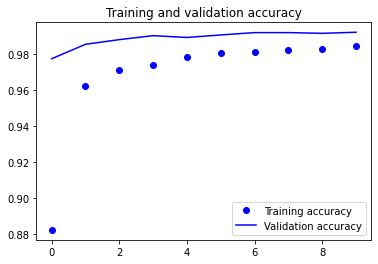

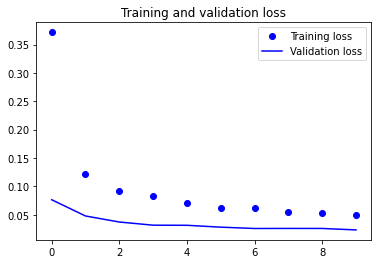

In [21]:
accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(len(accuracy))
plt.plot(epochs, accuracy, 'bo', label='Training accuracy')
plt.plot(epochs, val_accuracy, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

**As wee seen above plots our model is nor overfitted neither underfitted**

In [22]:
# Predict classes of unseen data
predicted_classes = model.predict(X_test)
print(f'{predicted_classes[:2]} \n')

# preiction is like probability of each class predicted for every data point, using below line of code, selected max probability index and this index is known
# as class for that data point
predicted_classes = np.argmax(np.round(predicted_classes),axis=1) 
print(predicted_classes[:2])


[[8.9066532e-10 6.6999696e-08 8.3080991e-08 5.6761587e-07 2.1626311e-08
  9.2989026e-11 3.3875351e-14 9.9999022e-01 2.2321869e-08 9.0389967e-06]
 [6.3105595e-08 1.0320403e-05 9.9998891e-01 3.1299022e-10 1.5994302e-10
  1.1242171e-11 7.0154641e-07 1.7770421e-10 7.2926261e-09 5.9434109e-13]] 

[7 2]


In [23]:
predicted_classes.shape, Y_test.shape

((10000,), (10000,))

In [24]:
# where predicted class & Actual class of datapoint is same assign 1 to that point else assign 0
u = np.where(predicted_classes==Y_test, 1,0)

In [25]:
print(f'{np.sum(u==1)} out of 10_000 predicted correctly')

9915 out of 10_000 predicted correctly


In [26]:
print(f'{len(y_test_cat)-(np.sum(u==1))} out of 10_000 are not correctly predicted')

85 out of 10_000 are not correctly predicted


Found 9915 correct labels


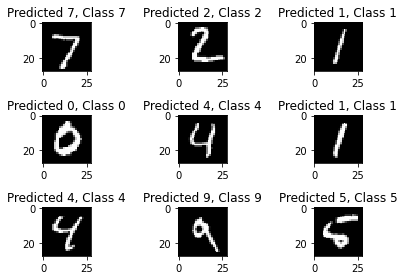

In [27]:
correct = np.where(predicted_classes==Y_test)[0] 
print("Found %d correct labels" % len(correct))
for i, correct in enumerate(correct[:9]):
    plt.subplot(3,3,i+1)
    plt.imshow(X_test[correct].reshape(28,28), cmap='gray', interpolation='none')
    plt.title("Predicted {}, Class {}".format(predicted_classes[correct], Y_test[correct]))
    plt.tight_layout()

In [28]:
# wrong Predicted classes
u_correct = np.where(~(predicted_classes==Y_test))[0]

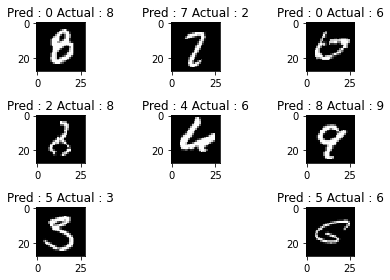

In [29]:
for ind, i in enumerate(u_correct[:9]):
  plt.subplot(3,3,ind+1)
  imshow(X_test[i].reshape(28,28))
  plt.title(f'Pred : {predicted_classes[i]} Actual : {Y_test[i]}')
  plt.tight_layout()

In [30]:
# confusion matrix
import seaborn as sns

# compute the confusion matrix
confusion_mtx = confusion_matrix(Y_test, predicted_classes)

In [31]:
print(f'{predicted_classes[:5]}\n')
print(Y_test[:5])

[7 2 1 0 4]

[7 2 1 0 4]


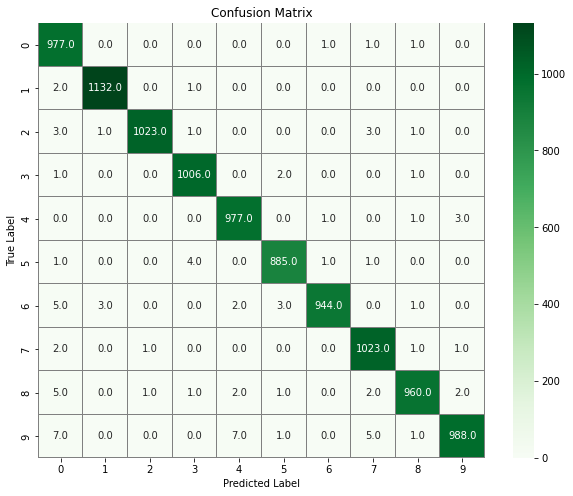

In [32]:
# plot the confusion matrix
f,ax = plt.subplots(figsize=(10, 8))
sns.heatmap(confusion_mtx, annot=True, linewidths=0.01,cmap="Greens",linecolor="gray", fmt= '.1f',ax=ax)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

In [34]:
from sklearn.metrics import classification_report
target_names = ["Class {}".format(i) for i in range(len(np.unique(Y_test)))]
print(classification_report(Y_test, predicted_classes, target_names=target_names))

              precision    recall  f1-score   support

     Class 0       0.97      1.00      0.99       980
     Class 1       1.00      1.00      1.00      1135
     Class 2       1.00      0.99      0.99      1032
     Class 3       0.99      1.00      0.99      1010
     Class 4       0.99      0.99      0.99       982
     Class 5       0.99      0.99      0.99       892
     Class 6       1.00      0.99      0.99       958
     Class 7       0.99      1.00      0.99      1028
     Class 8       0.99      0.99      0.99       974
     Class 9       0.99      0.98      0.99      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000

